<a href="https://colab.research.google.com/github/NicolasMndz/CoberturaVegetal-y-CalidadAire/blob/main/Prueba_modeloV1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix


df_i = pd.read_excel("datos.xlsx")

# Mostrar las primeras filas
df_i.head()

,id,fila,columna,x_utm,y_utm,red,green,blue,nir,gray,ndvi,gabor,clase,ruta_imagen
0,143,504,358,329305.5,365470.5,6546,5938,5447,6252,6063.818,-0.022972,321.812622,UA (Areas Urbanas),C:/Users/ALEJI/Documents/tdg2\Pance\2018\Febre...
1,142,505,323,329200.5,365467.5,6177,5784,5231,6704,5838.465,0.040913,165.123749,UA (Areas Urbanas),C:/Users/ALEJI/Documents/tdg2\Pance\2018\Febre...
2,140,101,613,330070.5,366679.5,6923,6337,5868,7229,6458.748,0.021622,299.915192,UA (Areas Urbanas),C:/Users/ALEJI/Documents/tdg2\Pance\2018\Febre...
3,139,218,508,329755.5,366328.5,6684,6184,5267,5950,6228.962,-0.058097,172.077606,UA (Areas Urbanas),C:/Users/ALEJI/Documents/tdg2\Pance\2018\Febre...
4,138,905,803,330640.5,364267.5,6017,5720,4628,7545,5684.315,0.112668,832.518982,BS (Suelo Desnudo),C:/Users/ALEJI/Documents/tdg2\Pance\2018\Febre...


## Tratamiento de datos

In [ ]:

columnas = ["red", "green", "blue", "nir", "gray", "ndvi", "gabor", "clase"]
df = df_i[columnas].copy()

In [ ]:
df.head()

,red,green,blue,nir,gray,ndvi,gabor,clase
0,6546,5938,5447,6252,6063.818,-0.022972,321.812622,UA (Areas Urbanas)
1,6177,5784,5231,6704,5838.465,0.040913,165.123749,UA (Areas Urbanas)
2,6923,6337,5868,7229,6458.748,0.021622,299.915192,UA (Areas Urbanas)
3,6684,6184,5267,5950,6228.962,-0.058097,172.077606,UA (Areas Urbanas)
4,6017,5720,4628,7545,5684.315,0.112668,832.518982,BS (Suelo Desnudo)


In [ ]:
df['clase'].value_counts()

,count
clase,
G (Cesped),37
UA (Areas Urbanas),35
BS (Suelo Desnudo),35
F (Bosque),35


In [ ]:
variables = ["red", "green", "blue", "nir", "gray","ndvi", "gabor"]

# Crear boxplots para todas esas columnas
df[variables].describe()

,red,green,blue,nir,gray,ndvi,gabor
count,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000
mean,2081.584507,2290.422535,2066.612676,4426.746479,2202.465641,0.465499,425.265501
std,2102.463261,1959.676512,1371.941482,2679.337738,1929.061429,0.218238,188.342494
min,367.000000,590.000000,535.000000,1773.000000,528.096000,-0.058097,104.577957
25%,619.750000,894.750000,1054.750000,2670.500000,838.513250,0.298796,287.216370
50%,873.500000,1181.500000,1472.000000,3314.000000,1127.304500,0.484440,424.115814
75%,4650.000000,4825.750000,3264.500000,6670.000000,4595.893500,0.638067,557.033340
max,6923.000000,6337.000000,5868.000000,13071.000000,6458.748000,0.826478,834.599365


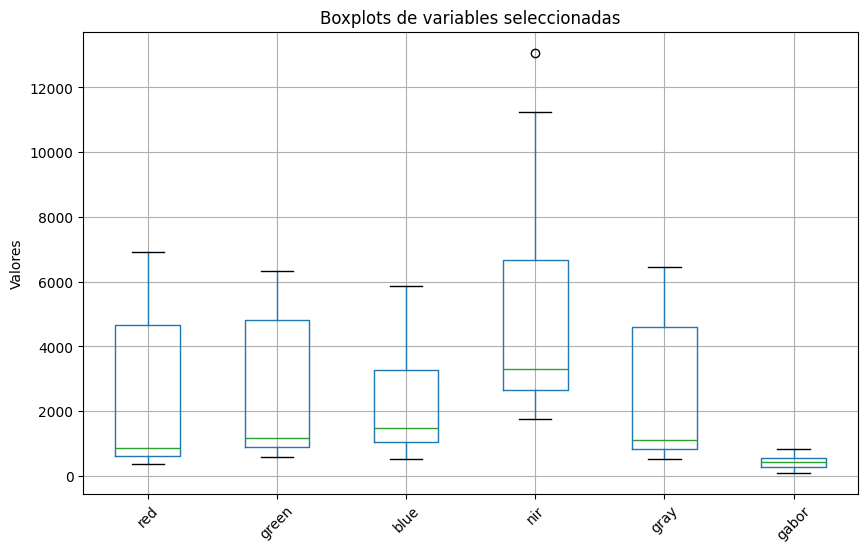

In [ ]:
import matplotlib.pyplot as plt

# Lista de variables que quieres graficar
variables = ["red", "green", "blue", "nir", "gray", "gabor"]

# Crear boxplots para todas esas columnas
df[variables].boxplot(figsize=(10,6))

plt.title("Boxplots de variables seleccionadas")
plt.ylabel("Valores")
plt.xticks(rotation=45)
plt.show()


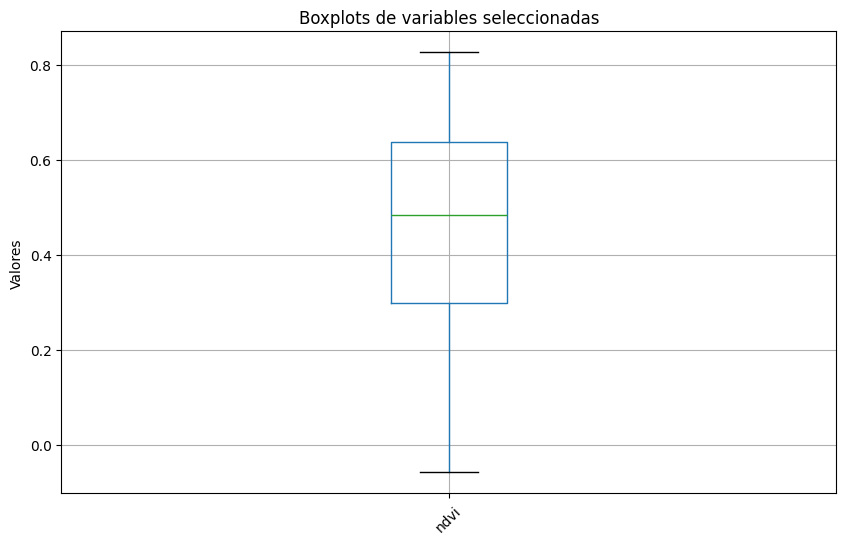

In [ ]:
import matplotlib.pyplot as plt

# Lista de variables que quieres graficar
variables = ["ndvi"]

# Crear boxplots para todas esas columnas
df[variables].boxplot(figsize=(10,6))

plt.title("Boxplots de variables seleccionadas")
plt.ylabel("Valores")
plt.xticks(rotation=45)
plt.show()

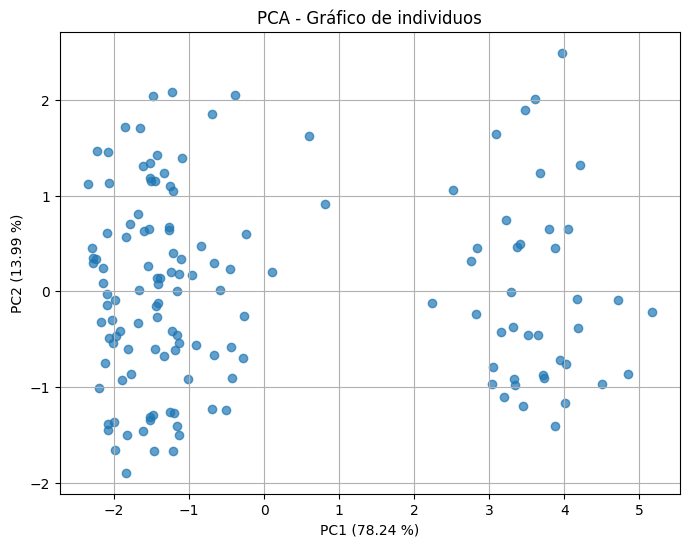

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Variables seleccionadas
variables = ["red", "green", "blue", "nir", "gray", "ndvi", "gabor"]

# Escalado de datos (muy importante para PCA)
X = df[variables].dropna()  # quitar NaN si los hay
X_scaled = StandardScaler().fit_transform(X)

# PCA con 2 componentes
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Crear DataFrame con los resultados
df_pca = pd.DataFrame(X_pca, columns=["PC1", "PC2"])

# Gráfico de individuos
plt.figure(figsize=(8,6))
plt.scatter(df_pca["PC1"], df_pca["PC2"], alpha=0.7)
plt.xlabel(f"PC1 ({pca.explained_variance_ratio_[0]*100:.2f} %)")
plt.ylabel(f"PC2 ({pca.explained_variance_ratio_[1]*100:.2f} %)")
plt.title("PCA - Gráfico de individuos")
plt.grid(True)
plt.show()

In [ ]:
import numpy as np

# Valores de la primera componente
pc1 = df_pca["PC1"]

# Media y desviación estándar
media_pc1 = np.mean(pc1)
std_pc1 = np.std(pc1)

# Marcamos como "outliers" los que están a más de 2 desviaciones de la media
df["outlier_pc1"] = np.where((pc1 > media_pc1 + 2*std_pc1) |
                             (pc1 < media_pc1 - 2*std_pc1), "Separado", "Centro")

# Revisar cuántos hay
print(df["outlier_pc1"].value_counts())

outlier_pc1
Centro      139
Separado      3
Name: count, dtype: int64


In [ ]:
df_i[df["outlier_pc1"]=='Separado']

,id,fila,columna,x_utm,y_utm,red,green,blue,nir,gray,ndvi,gabor,clase,ruta_imagen
0,143,504,358,329305.5,365470.5,6546,5938,5447,6252,6063.818,-0.022972,321.812622,UA (Areas Urbanas),C:/Users/ALEJI/Documents/tdg2\Pance\2018\Febre...
2,140,101,613,330070.5,366679.5,6923,6337,5868,7229,6458.748,0.021622,299.915192,UA (Areas Urbanas),C:/Users/ALEJI/Documents/tdg2\Pance\2018\Febre...
3,139,218,508,329755.5,366328.5,6684,6184,5267,5950,6228.962,-0.058097,172.077606,UA (Areas Urbanas),C:/Users/ALEJI/Documents/tdg2\Pance\2018\Febre...


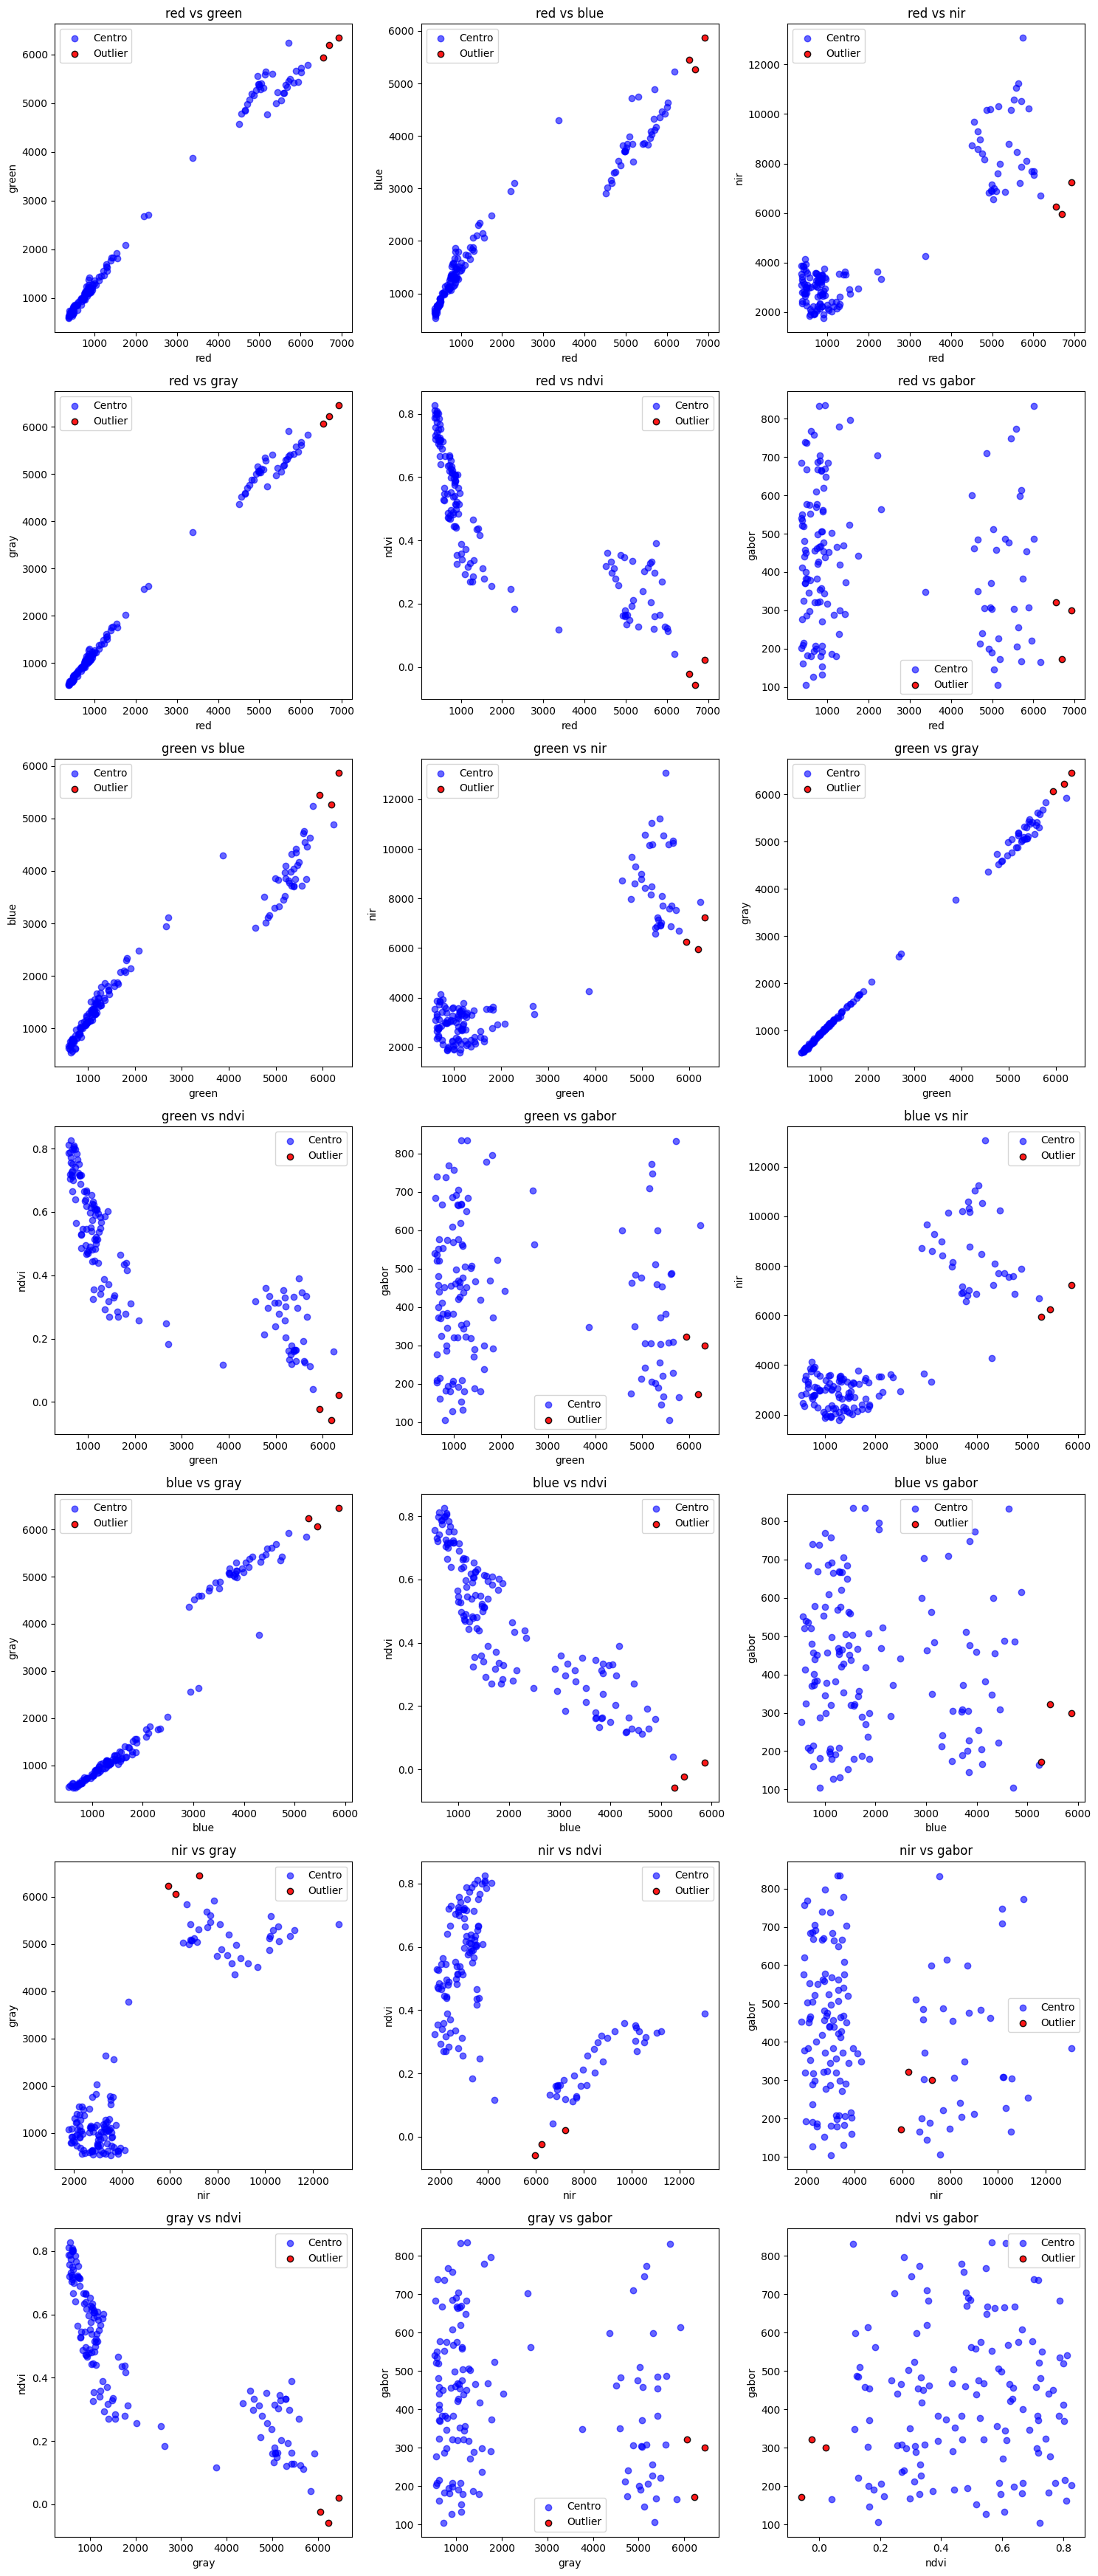

In [ ]:
import matplotlib.pyplot as plt
import itertools

variables = ["red", "green", "blue", "nir", "gray", "ndvi", "gabor"]

# Todas las combinaciones de pares de variables
pairs = list(itertools.combinations(variables, 2))

# Número de gráficos
n = len(pairs)
cols = 3
rows = int(np.ceil(n / cols))

plt.figure(figsize=(15, 5*rows))

for i, (x_var, y_var) in enumerate(pairs, 1):
    plt.subplot(rows, cols, i)

    # Dibujar los puntos normales
    mask_out = df["outlier_pc1"] == "Separado"
    plt.scatter(df.loc[~mask_out, x_var], df.loc[~mask_out, y_var],
                alpha=0.6, label="Centro", c="blue")

    # Dibujar los outliers
    plt.scatter(df.loc[mask_out, x_var], df.loc[mask_out, y_var],
                alpha=0.9, label="Outlier", c="red", edgecolor="k")

    plt.xlabel(x_var)
    plt.ylabel(y_var)
    plt.title(f"{x_var} vs {y_var}")
    plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
df2=df[df['outlier_pc1']!="Separado"].copy()

In [ ]:


X = df2.drop(["clase","outlier_pc1"], axis=1)
y = df2["clase"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y
)

rf = RandomForestClassifier(
    n_estimators=100,   # número de árboles

    n_jobs=-1
)

rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

print("Matriz de confusión:\n", confusion_matrix(y_test, y_pred))
print("\nReporte de clasificación:\n", classification_report(y_test, y_pred))

# Importancia de variables
importances = pd.Series(rf.feature_importances_, index=X.columns)
print("\nImportancia de variables:\n", importances.sort_values(ascending=False))


Matriz de confusión:
 [[11  0  0  0]
 [ 0  9  1  0]
 [ 2  1  8  0]
 [ 5  0  0  5]]

Reporte de clasificación:
                     precision    recall  f1-score   support

BS (Suelo Desnudo)       0.61      1.00      0.76        11
        F (Bosque)       0.90      0.90      0.90        10
        G (Cesped)       0.89      0.73      0.80        11
UA (Areas Urbanas)       1.00      0.50      0.67        10

          accuracy                           0.79        42
         macro avg       0.85      0.78      0.78        42
      weighted avg       0.85      0.79      0.78        42


Importancia de variables:
 nir      0.174687
green    0.164322
blue     0.162885
ndvi     0.153692
gray     0.140878
red      0.128854
gabor    0.074683
dtype: float64


In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
import pandas as pd

# Separar X e y
X = df2.drop(["clase", "outlier_pc1"], axis=1)
y = df2["clase"]

# Dividir datos (sin random_state)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y
)

# Definir modelo base (sin random_state)
rf = RandomForestClassifier(n_jobs=-1)

# Definir rejilla de parámetros
param_grid = {
    "n_estimators": [50, 100,200],         # número de árboles
    "max_depth": [None, 10,40],          # profundidad máxima
    "min_samples_split": [2, 20],         # mínimo para dividir
    "min_samples_leaf": [2,20],           # mínimo en hojas
    "max_features": ["sqrt", "log2", None]   # número de variables por división
}

# Grid Search con validación cruzada (5 folds)
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=4,               # validación cruzada 5-fold
    n_jobs=-1,
    scoring="accuracy",
    verbose=2
)

# Entrenar
grid_search.fit(X_train, y_train)

# Mejor modelo encontrado
best_rf = grid_search.best_estimator_
print("Mejores hiperparámetros encontrados:\n", grid_search.best_params_)

# Evaluación en test
y_pred = best_rf.predict(X_test)

print("\nMatriz de confusión:\n", confusion_matrix(y_test, y_pred))
print("\nReporte de clasificación:\n", classification_report(y_test, y_pred))

# Importancia de variables
importances = pd.Series(best_rf.feature_importances_, index=X.columns)
print("\nImportancia de variables:\n", importances.sort_values(ascending=False))


Fitting 4 folds for each of 108 candidates, totalling 432 fits


KeyboardInterrupt: 

In [ ]:
print("Mejor accuracy promedio (CV):", grid_search.best_score_)


Mejor accuracy promedio (CV): 0.69125


In [ ]:
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Definir el modelo base (sin random_state)
rf = RandomForestClassifier(n_jobs=-1)

# Definir la rejilla de hiperparámetros
param_grid = {
    "n_estimators": [100]

}

# Definir validación cruzada estratificada
cv = StratifiedKFold(n_splits=5, shuffle=True)

# Grid Search con validación cruzada estratificada
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=cv,                # aquí usamos StratifiedKFold
    n_jobs=-1,
    scoring="accuracy",
    verbose=2
)

# Entrenamiento
grid_search.fit(X_train, y_train)

# Mejor modelo encontrado
best_rf = grid_search.best_estimator_
print("Mejores hiperparámetros encontrados:\n", grid_search.best_params_)

# Resultados
print("Mejores hiperparámetros encontrados:\n", grid_search.best_params_)
print("Mejor accuracy promedio (CV):", grid_search.best_score_)

# Evaluación en test
y_pred = best_rf.predict(X_test)

print("\nMatriz de confusión:\n", confusion_matrix(y_test, y_pred))
print("\nReporte de clasificación:\n", classification_report(y_test, y_pred))

# Importancia de variables
importances = pd.Series(best_rf.feature_importances_, index=X.columns)
print("\nImportancia de variables:\n", importances.sort_values(ascending=False))

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Mejores hiperparámetros encontrados:
 {'n_estimators': 100}
Mejores hiperparámetros encontrados:
 {'n_estimators': 100}
Mejor accuracy promedio (CV): 0.7347368421052631

Matriz de confusión:
 [[6 0 0 4]
 [0 8 1 2]
 [1 2 7 1]
 [2 0 0 8]]

Reporte de clasificación:
                     precision    recall  f1-score   support

BS (Suelo Desnudo)       0.67      0.60      0.63        10
        F (Bosque)       0.80      0.73      0.76        11
        G (Cesped)       0.88      0.64      0.74        11
UA (Areas Urbanas)       0.53      0.80      0.64        10

          accuracy                           0.69        42
         macro avg       0.72      0.69      0.69        42
      weighted avg       0.72      0.69      0.70        42


Importancia de variables:
 nir      0.189994
blue     0.158859
gray     0.156799
green    0.155692
red      0.138875
ndvi     0.138177
gabor    0.061604
dtype: float64


In [ ]:

# Evaluación en test
y_pred = best_rf.predict(X_test)

print("\nMatriz de confusión:\n", confusion_matrix(y_test, y_pred))
print("\nReporte de clasificación:\n", classification_report(y_test, y_pred))

# Importancia de variables
importances = pd.Series(best_rf.feature_importances_, index=X.columns)
print("\nImportancia de variables:\n", importances.sort_values(ascending=False))



Matriz de confusión:
 [[6 0 0 4]
 [0 8 1 2]
 [1 2 7 1]
 [2 0 0 8]]

Reporte de clasificación:
                     precision    recall  f1-score   support

BS (Suelo Desnudo)       0.67      0.60      0.63        10
        F (Bosque)       0.80      0.73      0.76        11
        G (Cesped)       0.88      0.64      0.74        11
UA (Areas Urbanas)       0.53      0.80      0.64        10

          accuracy                           0.69        42
         macro avg       0.72      0.69      0.69        42
      weighted avg       0.72      0.69      0.70        42


Importancia de variables:
 nir      0.189994
blue     0.158859
gray     0.156799
green    0.155692
red      0.138875
ndvi     0.138177
gabor    0.061604
dtype: float64


## Modelo uniendo clases UA &  BS


In [ ]:
df3=df2.copy()

In [ ]:
df3.loc[df3['clase'].isin(['UA (Areas Urbanas)','BS (Suelo Desnudo)']),'clase']='UA (Areas Urbanas) & BS (Suelo Desnudo)'

In [ ]:

X = df3.drop(["clase","outlier_pc1","gabor"], axis=1)
y = df3["clase"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y
)

rf = RandomForestClassifier(
    n_estimators=100,   # número de árboles

    n_jobs=-1
)

rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

print("Matriz de confusión:\n", confusion_matrix(y_test, y_pred))
print("\nReporte de clasificación:\n", classification_report(y_test, y_pred))

# Importancia de variables
importances = pd.Series(rf.feature_importances_, index=X.columns)
print("\nImportancia de variables:\n", importances.sort_values(ascending=False))


Matriz de confusión:
 [[ 9  0  2]
 [ 2  8  1]
 [ 0  0 20]]

Reporte de clasificación:
                                          precision    recall  f1-score   support

                             F (Bosque)       0.82      0.82      0.82        11
                             G (Cesped)       1.00      0.73      0.84        11
UA (Areas Urbanas) & BS (Suelo Desnudo)       0.87      1.00      0.93        20

                               accuracy                           0.88        42
                              macro avg       0.90      0.85      0.86        42
                           weighted avg       0.89      0.88      0.88        42


Importancia de variables:
 green    0.209422
nir      0.178030
gray     0.163944
blue     0.160189
red      0.146474
ndvi     0.141941
dtype: float64


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from joblib import dump, load

# Supongamos que ya entrenaste tu modelo
# modelo = RandomForestClassifier(...)
# modelo.fit(X_train, y_train)

# Guardar el modelo
dump(rf, 'modelo_random_forest.joblib')

['modelo_random_forest.joblib']

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
import pandas as pd

# Separar X e y
X = df3.drop(["clase", "outlier_pc1"], axis=1)
y = df3["clase"]

# Dividir datos (sin random_state)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y
)

# Definir modelo base (sin random_state)
rf = RandomForestClassifier(n_jobs=-1)

# Definir rejilla de parámetros
param_grid = {
    "n_estimators": [50, 100, 200],         # número de árboles
    "max_depth": [None, 10,20],          # profundidad máxima
    "min_samples_split": [2, 10],         # mínimo para dividir
    "min_samples_leaf": [2,10],           # mínimo en hojas
    "max_features": ["sqrt", "log2", None]   # número de variables por división
}

# Grid Search con validación cruzada (5 folds)
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=4,               # validación cruzada 5-fold
    n_jobs=-1,
    scoring="accuracy",
    verbose=2
)

# Entrenar
grid_search.fit(X_train, y_train)

# Mejor modelo encontrado
best_rf = grid_search.best_estimator_
print("Mejores hiperparámetros encontrados:\n", grid_search.best_params_)

# Evaluación en test
y_pred = best_rf.predict(X_test)

print("\nMatriz de confusión:\n", confusion_matrix(y_test, y_pred))
print("\nReporte de clasificación:\n", classification_report(y_test, y_pred))

# Importancia de variables
importances = pd.Series(best_rf.feature_importances_, index=X.columns)
print("\nImportancia de variables:\n", importances.sort_values(ascending=False))


Fitting 4 folds for each of 108 candidates, totalling 432 fits


KeyboardInterrupt: 

In [ ]:

print("Mejor accuracy promedio (CV):", grid_search.best_score_)

Mejores hiperparámetros encontrados:
 {'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
Mejor accuracy promedio (CV): 0.835


## Comparación con otros modelos

In [ ]:
# ==========================================================
# 1. Importar librerías
# ==========================================================
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
import pandas as pd


In [ ]:

# ==========================================================
# 2. Separar X e y
# ==========================================================
X = df3.drop(["clase", "outlier_pc1"], axis=1)
y = df3["clase"]

# ==========================================================
# 3. Codificar y (XGBoost lo requiere)
# ==========================================================
le = LabelEncoder()
y = le.fit_transform(y)

# ==========================================================
# 4. División del dataset
# ==========================================================
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    stratify=y
)

# ==========================================================
# 5. Definir modelos y sus grids
# ==========================================================
modelos_y_grids = {

    "RandomForest": {
        "modelo": RandomForestClassifier(),
        "param_grid": {
            "n_estimators": [100, 200],
            "max_depth": [None, 10, 20],
            "min_samples_split": [2, 10],
            "min_samples_leaf": [1, 5],
            "max_features": ["sqrt", "log2"]
        }
    },

    "XGBoost": {
        "modelo": XGBClassifier(eval_metric="mlogloss", use_label_encoder=False),
        "param_grid": {
            "n_estimators": [100, 200],
            "max_depth": [4, 6, 8],
            "learning_rate": [0.05, 0.1],
            "subsample": [0.8, 1],
            "colsample_bytree": [0.8, 1]
        }
    },

    "SVM": {
        "modelo": Pipeline([
            ("scaler", StandardScaler()),
            ("svc", SVC())
        ]),
        "param_grid": {
            "svc__C": [0.1, 1, 10],
            "svc__kernel": ["rbf", "poly"],
            "svc__gamma": ["scale", "auto"]
        }
    },

    "LogisticRegression": {
        "modelo": Pipeline([
            ("scaler", StandardScaler()),
            ("lr", LogisticRegression(max_iter=1000))
        ]),
        "param_grid": {
            "lr__C": [0.1, 1, 10],
            "lr__penalty": ["l2"],
            "lr__solver": ["lbfgs"]
        }
    },

    "NeuralNetwork": {
        "modelo": Pipeline([
            ("scaler", StandardScaler()),
            ("mlp", MLPClassifier(max_iter=500))
        ]),
        "param_grid": {
            "mlp__hidden_layer_sizes": [(50,), (100,), (100, 50)],
            "mlp__activation": ["relu", "tanh"],
            "mlp__alpha": [0.0001, 0.001]
        }
    }
}


In [ ]:


# ==========================================================
# 6. Entrenar cada modelo con GridSearchCV
# ==========================================================
mejores_modelos = {}
resultados = {}

for nombre, info in modelos_y_grids.items():
    print(f"\n\n========== Entrenando {nombre} ==========")

    modelo = info["modelo"]
    grid = info["param_grid"]

    grid_search = GridSearchCV(
        estimator=modelo,
        param_grid=grid,
        cv=4,               # validación cruzada
        n_jobs=-1,
        scoring="accuracy",
        verbose=1
    )

    grid_search.fit(X_train, y_train)

    print("\nMejores hiperparámetros:", grid_search.best_params_)

    mejor_modelo = grid_search.best_estimator_
    mejores_modelos[nombre] = mejor_modelo

    # Evaluación en test
    y_pred = mejor_modelo.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    resultados[nombre] = acc

    print(f"\nAccuracy en test: {acc:.4f}")
    print(classification_report(y_test, y_pred))


# ==========================================================
# 7. Ranking final
# ==========================================================
ranking = pd.Series(resultados).sort_values(ascending=False)

print("\n\n=========== RANKING FINAL DE MODELOS ===========")
print(ranking)




========== Entrenando RandomForest ==========
Fitting 4 folds for each of 48 candidates, totalling 192 fits

Mejores hiperparámetros: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}

Accuracy en test: 0.8333
              precision    recall  f1-score   support

           0       0.80      0.73      0.76        11
           1       0.89      0.73      0.80        11
           2       0.83      0.95      0.88        20

    accuracy                           0.83        42
   macro avg       0.84      0.80      0.82        42
weighted avg       0.84      0.83      0.83        42



========== Entrenando XGBoost ==========
Fitting 4 folds for each of 48 candidates, totalling 192 fits


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [00:10:55] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



Mejores hiperparámetros: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 100, 'subsample': 0.8}

Accuracy en test: 0.8095
              precision    recall  f1-score   support

           0       0.89      0.73      0.80        11
           1       0.70      0.64      0.67        11
           2       0.83      0.95      0.88        20

    accuracy                           0.81        42
   macro avg       0.80      0.77      0.78        42
weighted avg       0.81      0.81      0.80        42



========== Entrenando SVM ==========
Fitting 4 folds for each of 12 candidates, totalling 48 fits

Mejores hiperparámetros: {'svc__C': 10, 'svc__gamma': 'scale', 'svc__kernel': 'rbf'}

Accuracy en test: 0.6429
              precision    recall  f1-score   support

           0       0.67      0.55      0.60        11
           1       0.44      0.36      0.40        11
           2       0.71      0.85      0.77        20

    accuracy                      

/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


# Task
Classify each pixel of the satellite image "/content/20180811_150040_103b_3B_AnalyticMS_SR_clip.tif" using the previously trained Random Forest model to determine if it has vegetation cover.

## Load the trained model

### Subtask:
Load the best Random Forest model obtained from the grid search.


**Reasoning**:
Access the best trained model from the grid_search object and store it in a variable.



In [ ]:
best_rf_model = rf

## Read image bands

### Subtask:
Read the relevant bands from the satellite image that correspond to the features used in the model ('red', 'green', 'blue', 'nir', 'gray', 'ndvi', 'gabor').


**Reasoning**:
Read the specified bands from the satellite image using rasterio.



Image shape: (1001, 1001)
Number of bands: 4
Coordinate system: EPSG:32618
Transform: | 3.00, 0.00, 329940.00|
| 0.00,-3.00, 387105.00|
| 0.00, 0.00, 1.00|
Bounds: BoundingBox(left=329940.0, bottom=384102.0, right=332943.0, top=387105.0)


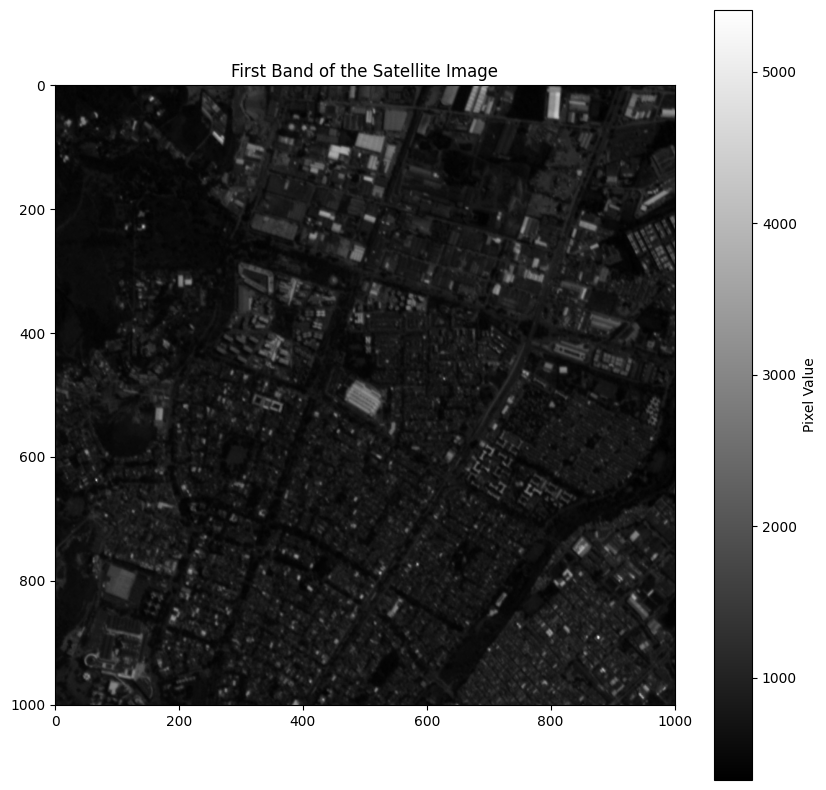

In [ ]:
import rasterio
import matplotlib.pyplot as plt
import numpy as np

# Define the file path
image_path = '/content/20180811_150040_103b_3B_AnalyticMS_SR_clip.tif'

# Open the image file
try:
    with rasterio.open(image_path) as src:
        print(f"Image shape: {src.shape}")
        print(f"Number of bands: {src.count}")
        print(f"Coordinate system: {src.crs}")
        print(f"Transform: {src.transform}")
        print(f"Bounds: {src.bounds}")

        # Read a band (e.g., the first band)
        band1 = src.read(1)

        # Display the band
        plt.figure(figsize=(10, 10))
        plt.imshow(band1, cmap='gray')
        plt.title("First Band of the Satellite Image")
        plt.colorbar(label="Pixel Value")
        plt.show()

except rasterio.errors.RasterioIOError as e:
    print(f"Error opening or reading the image file: {e}")
except Exception as e:
    print(f"An error occurred: {e}")

**Reasoning**:
Calculate the 'gray' and 'ndvi' bands from the read bands.



In [ ]:
# Calculate 'gray' band (simple average of visible bands)
gray_band = (red_band + green_band + blue_band) / 3

# Calculate 'ndvi' band
# Avoid division by zero
denominator = (nir_band + red_band).astype(float)
denominator[denominator == 0] = 1e-9 # Replace zero with a small number to avoid division by zero
ndvi_band = (nir_band - red_band) / denominator


## Read image bands

### Subtask:
Read the relevant bands from the satellite image that correspond to the features used in the model ('red', 'green', 'blue', 'nir', 'gray', 'ndvi', 'gabor').


**Reasoning**:
Read the relevant bands from the satellite image and calculate the 'gray' and 'ndvi' bands based on the instructions.



In [ ]:
import rasterio
import numpy as np

image_path = "/content/20180811_150040_103b_3B_AnalyticMS_SR_clip.tif"

with rasterio.open(image_path) as src:
    # Read bands. Assuming bands are in order: Blue, Green, Red, NIR.
    # Double checking band descriptions if available
    band_descriptions = src.descriptions
    print(f"Band descriptions: {band_descriptions}")

    blue_band = src.read(1)
    green_band = src.read(2)
    red_band = src.read(3)
    nir_band = src.read(4)

# Calculate 'gray' band (average of visible bands)
gray_band = (red_band.astype(float) + green_band.astype(float) + blue_band.astype(float)) / 3

# Calculate 'ndvi' band
# Avoid division by zero
denominator = (nir_band.astype(float) + red_band.astype(float))
denominator[denominator == 0] = 1e-9 # Replace zero with a small number to avoid division by zero
ndvi_band = (nir_band.astype(float) - red_band.astype(float)) / denominator

# Store bands in a dictionary for easier access
image_bands = {
    'red': red_band,
    'green': green_band,
    'blue': blue_band,
    'nir': nir_band,
    'gray': gray_band,
    'ndvi': ndvi_band
}

Band descriptions: ('blue', 'green', 'red', 'nir')


## Prepare image data for prediction

### Subtask:
Reshape the image data and create a DataFrame with the same column names as the training data.


**Reasoning**:
Reshape the image data and create a DataFrame with the same column names as the training data.



In [ ]:
image_data_dict = {}
for band_name, band_data in image_bands.items():
    image_data_dict[band_name] = band_data.flatten()

image_df = pd.DataFrame(image_data_dict)

## Classify image pixels

### Subtask:
Use the loaded model to predict the class for each pixel in the prepared image data.


**Reasoning**:
Use the trained Random Forest model to predict the class for each pixel in the image DataFrame.



In [ ]:
predicted_classes = best_rf_model.predict(image_df)

## Reshape and visualize the classification results

### Subtask:
Reshape the predicted classes back into an image format and display the classification map.

**Reasoning**:
Reshape the predicted classes to the original image dimensions and visualize the classification map.

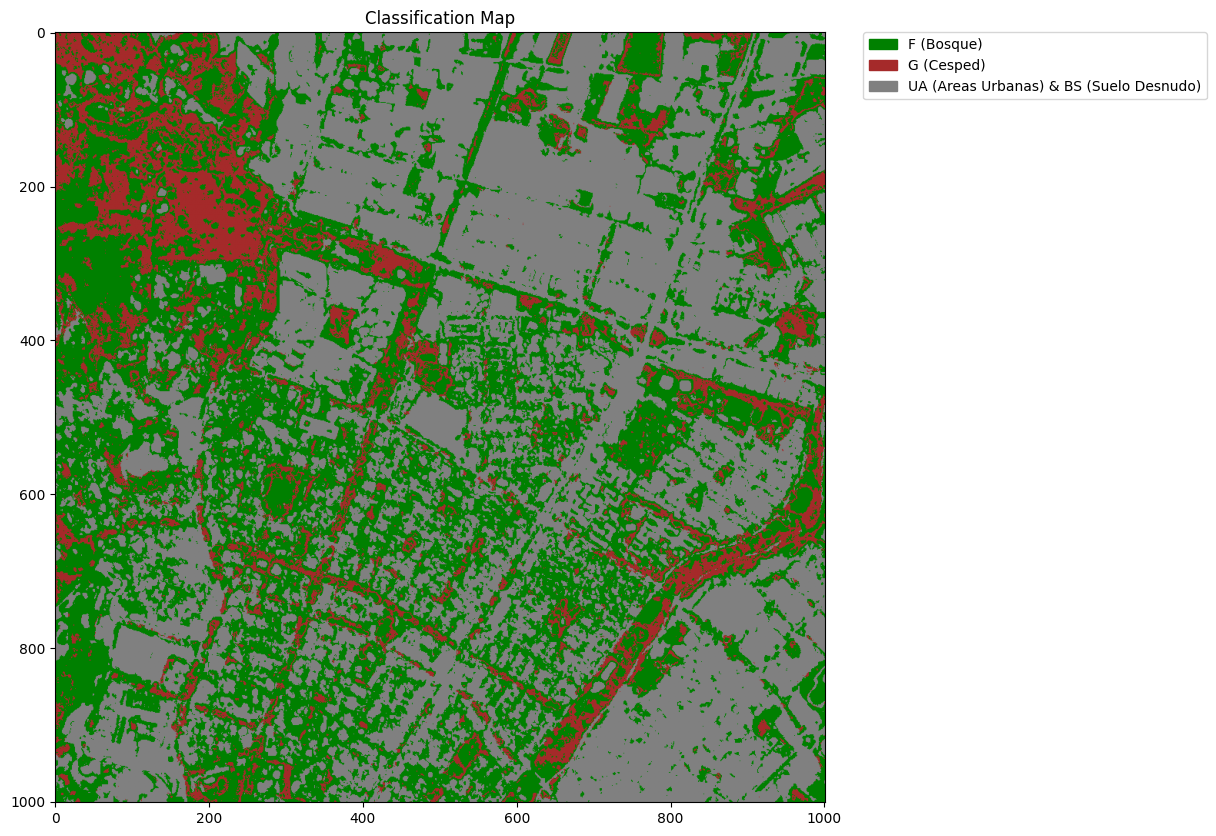

In [ ]:
import matplotlib.patches as mpatches

# Get the original image dimensions
with rasterio.open(image_path) as src:
    height = src.height
    width = src.width
    profile = src.profile # Get the metadata for saving later

# Map class labels to numerical values for visualization
unique_classes = np.unique(predicted_classes)
class_to_value = {class_name: i for i, class_name in enumerate(unique_classes)}
numerical_classification_map = np.array([class_to_value[class_name] for class_name in predicted_classes])

# Reshape the numerical classification map back to the original image dimensions
classification_map_reshaped = numerical_classification_map.reshape(height, width)

# Define colors for each class (you can customize these)
# Make sure the number of colors matches the number of unique classes
colors = ['green', 'brown', 'gray'] # Example colors for F (Bosque), G (Cesped), UA & BS

# Create a colormap from the defined colors
cmap = plt.cm.colors.ListedColormap(colors[:len(unique_classes)])

# Create a legend
patches = [mpatches.Patch(color=colors[i], label=class_name)
           for i, class_name in enumerate(unique_classes)]

# Visualize the classification map
plt.figure(figsize=(10, 10))
plt.imshow(classification_map_reshaped, cmap=cmap)
plt.title("Classification Map")
plt.legend(handles=patches, bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

## Classify image pixels

### Subtask:
Use the loaded model to predict the class for each pixel in the prepared image data, accounting for the missing 'gabor' feature.


## Display Original Image (Normalized)

### Subtask:
Display a color composite of the original satellite image with pixel values normalized to [0, 255].

**Reasoning**:
Read the red, green, and blue bands from the image, normalize their values, and stack them to create a color composite for visualization.

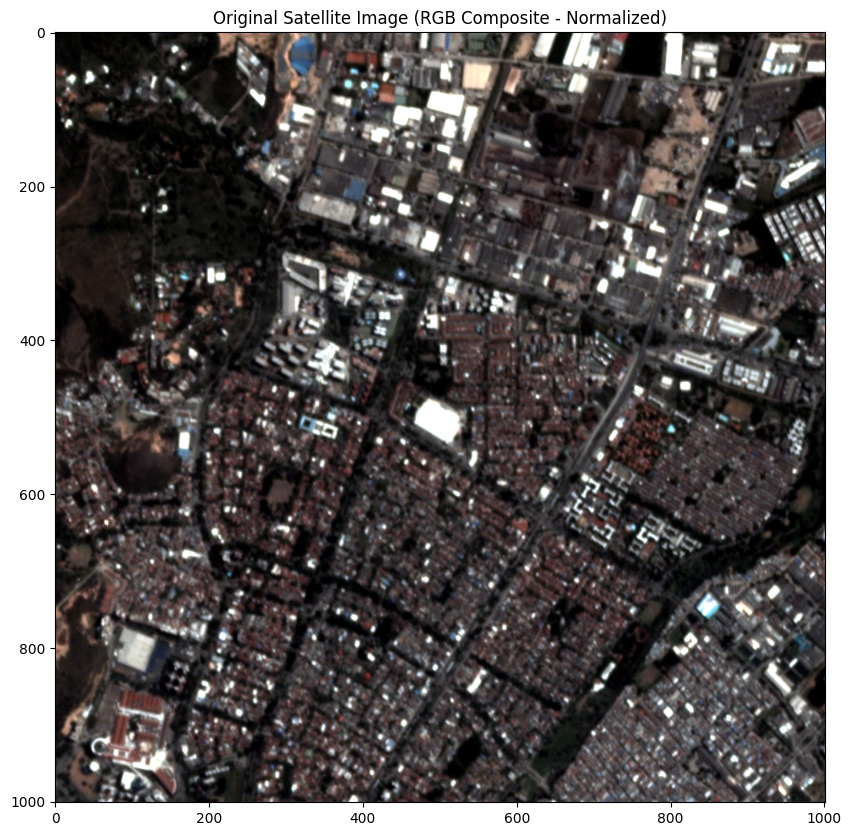

In [ ]:
import rasterio
from rasterio.plot import show
import matplotlib.pyplot as plt
import numpy as np

image_path = "/content/20180811_150040_103b_3B_AnalyticMS_SR_clip.tif"

with rasterio.open(image_path) as src:
    # Read the Red, Green, and Blue bands
    # Assuming the bands are in order: Blue, Green, Red, NIR (check src.descriptions if unsure)
    blue = src.read(1).astype(np.float32)
    green = src.read(2).astype(np.float32)
    red = src.read(3).astype(np.float32)

    # Normalize the pixel values to the range [0, 255]
    # Find the min and max values for each band
    min_val_red, max_val_red = np.percentile(red, (2, 98)) # Using percentiles to handle outliers
    min_val_green, max_val_green = np.percentile(green, (2, 98))
    min_val_blue, max_val_blue = np.percentile(blue, (2, 98))

    red_normalized = (red - min_val_red) / (max_val_red - min_val_red) * 255
    green_normalized = (green - min_val_green) / (max_val_green - min_val_green) * 255
    blue_normalized = (blue - min_val_blue) / (max_val_blue - min_val_blue) * 255

    # Clip values to the [0, 255] range
    red_normalized[red_normalized < 0] = 0
    red_normalized[red_normalized > 255] = 255
    green_normalized[green_normalized < 0] = 0
    green_normalized[green_normalized > 255] = 255
    blue_normalized[blue_normalized < 0] = 0
    blue_normalized[blue_normalized > 255] = 255

    # Convert to uint8
    red_normalized = red_normalized.astype(np.uint8)
    green_normalized = green_normalized.astype(np.uint8)
    blue_normalized = blue_normalized.astype(np.uint8)

    # Stack the normalized bands to create a color composite (order: Red, Green, Blue)
    rgb_composite_normalized = np.dstack((red_normalized, green_normalized, blue_normalized))

    # Display the color composite
    plt.figure(figsize=(10, 10))
    plt.imshow(rgb_composite_normalized)
    plt.title("Original Satellite Image (RGB Composite - Normalized)")
    plt.show()

**Reasoning**:
I need to predict the class for each pixel using the trained model. The previous attempt failed because the 'gabor' feature was missing in the image data. I will confirm the columns in `image_df`, inspect the model's expected features, create a new DataFrame with matching columns and order, and then perform the prediction.

